In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
#from tqdm.notebook import tqdm

In [10]:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

train_data.head()

,x,y
0,34,36.951713
1,77,75.385850
2,70,72.652601
3,55,53.178152
4,14,20.836313


In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [17]:
def plot_predictions(train_data: torch.Tensor,
                     train_labels: torch.Tensor,
                     test_data: torch.Tensor,
                     test_labels: torch.Tensor,
                     predictions: torch.Tensor = None):
    plt.figure(figsize=(5, 4))

    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14});

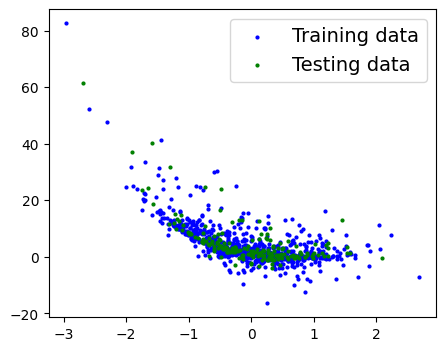

In [18]:
splitter = int(0.8 * len(X))
X_train, y_train = X[:splitter], y[:splitter]
X_test, y_test = X[splitter:], y[splitter:]

#print(f"Train Length: {len(X_train)}")
#print(f"Test Length: {len(X_test)}")


plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [12]:
data: pd.DataFrame = pd.read_csv("data.csv", index_col=0)
print(data.head())

data_copy = data.copy()
X = data_copy['x1']
y = data_copy['y']

          y        x1        x2        x3        x4        x5        x6  \
0  7.824944 -0.887890  0.949137  0.867185  0.905457 -0.564753  1.064772   
1 -0.284809  0.402109 -0.109812  0.353789 -0.368996  0.484929 -0.872589   
2 -5.551631 -0.114545 -1.603722  0.284455 -0.276847 -1.421414 -1.135600   
3  0.087262  0.832631  0.443724  0.472880  1.260798  0.589971 -0.150165   
4  0.169201  0.318175 -0.042458  0.014656  0.323378  0.425665  0.268726   

         x7        x8        x9       x10  
0  0.871957  0.073367 -0.468684 -1.518201  
1 -0.305881 -0.284581  0.547374 -0.755235  
2 -0.021529 -0.826239  0.647715 -2.370580  
3  1.148314  1.034029 -0.205375 -0.488831  
4  0.177851 -0.128694  0.110501  0.797469  


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# Create the model
class PolynomialRegression(nn.Module):
  def __init__(self, degree):
    super(PolynomialRegression, self).__init__()
    self.linear = nn.Linear(degree, 1)

  def forward(self, x):
    return self.linear(x)

# Create the model
model = PolynomialRegression(degree=2)

loss_function = nn.L1Loss() # Mean Absolute Error

# Create the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)



In [15]:
def train(
        model: nn.Module,
        train_data: torch.Tensor,
        train_labels: torch.Tensor,
        test_data: torch.Tensor,
        test_labels: torch.Tensor,
        loss_function: nn.Module,
        optimizer: torch.optim.Optimizer,
        epochs: int,
    ):
    epochs_count ,train_loss_arr, test_loss_arr = [], [], []
    for epoch in range(epochs+1):
        model.train()
        y_pred = model(train_data)
        loss = loss_function(y_pred, train_labels)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        model.eval()
        with torch.inference_mode():
            y_pred = model(test_data)
            test_loss = loss_function(y_pred, test_labels)

        if epoch % 10 == 0:
            epochs_count.append(epoch)
            train_loss_arr.append(loss.detach().numpy())
            test_loss_arr.append(test_loss.detach().numpy())
            print(f"Epoch {epoch}: MAE Loss: {loss.item():0.2f} | Test Loss: {test_loss.item():0.2f}")
    return epochs_count, train_loss_arr, test_loss_arr


In [20]:
import numpy as np
x_train_trans = torch.tensor(X_train)
y_train = torch.tensor(y_train)
x_test_trans  =torch.tensor(X_test)
y_test = torch.tensor(np.array(y_test))


epochs_count, train_loss, test_loss = train(
                                        model, 
                                        train_data=x_train_trans, 
                                        train_labels=y_train, 
                                        test_data=x_test_trans, 
                                        test_labels=y_test, 
                                        loss_function=loss_function, 
                                        optimizer=optimizer, 
                                        epochs=1000
                                    )

ValueError: could not determine the shape of object type 'Series'